Install the package via "pip install git+https://github.com/TUHH-TVT/openCOSMO-RS_py"

Import the module

In [1]:
import numpy as np

from opencosmorspy import COSMORS

Choose a parameterization (default_turbomole or default_orca). You can either instanciate a parameterization object and pass it to the COSMORS constructor, or let the COSMORS class take over the instanciation. To use the newest parameterization please check last exmaple.

In [2]:
crs = COSMORS(par='default_orca')

To modify parameters, currently indivual properties of the parameters class are overwritten. 

In [4]:
crs.par.calculate_contact_statistics_molecule_properties = True

In [5]:
print(crs.par)

default_orca:
                                      qc_program : orca
                                  descriptor_lst : ['sigma', 'sigma_orth', 'elmnt_nr', 'group', 'mol_charge']
                                           a_eff : 6.226
                                            r_av : 0.5
                                       sigma_min : -0.15
                                       sigma_max : 0.15
                                      sigma_step : 0.001
                                      sigma_grid : [-1.50000000e-01 -1.49000000e-01 -1.48000000e-01 -1.47000000e-01
 -1.46000000e-01 -1.45000000e-01 -1.44000000e-01 -1.43000000e-01
 -1.42000000e-01 -1.41000000e-01 -1.40000000e-01 -1.39000000e-01
 -1.38000000e-01 -1.37000000e-01 -1.36000000e-01 -1.35000000e-01
 -1.34000000e-01 -1.33000000e-01 -1.32000000e-01 -1.31000000e-01
 -1.30000000e-01 -1.29000000e-01 -1.28000000e-01 -1.27000000e-01
 -1.26000000e-01 -1.25000000e-01 -1.24000000e-01 -1.23000000e-01
 -1.22000000e-01 -1.21000000e-01

Add a molecule:

In [6]:
mol_structure_list_0 = ['./../tests/COSMO_ORCA/C2H2Cl4_001_1112tetrachloroethane/COSMO_TZVPD/C2H2Cl4_001_1112tetrachloroethane_CnfS1_c000.orcacosmo']
crs.add_molecule(mol_structure_list_0)

You can clear the list of molecules at any stage:

In [7]:
crs.clear_molecules()

But now we do want to add two molecules. At present, only one molecular structure per molecule is supported.

In [8]:
mol_structure_list_0 = ['./../tests/COSMO_ORCA/C2H2Cl4_001_1112tetrachloroethane/COSMO_TZVPD/C2H2Cl4_001_1112tetrachloroethane_CnfS1_c000.orcacosmo']
crs.add_molecule(mol_structure_list_0)
crs.add_molecule(['./../tests/COSMO_ORCA/H2O/COSMO_TZVPD/H2O_c000.orcacosmo'])

Let us add two jobs:

In [9]:
x = np.array([0.0, 1.0])
T = 298.15
crs.add_job(x, T, refst='pure_component')

In [10]:
x = np.array([0.5, .5])
T = 298.15
crs.add_job(x, T, refst='pure_component')

In [11]:
results = crs.calculate()

In [12]:
print('Total logarithmic activity coefficient: ', results['tot']['lng'])
print('Residual logarithmic activity coefficient: ', results['enth']['lng'])
print('Combinatorial logarithmic activity coefficient:', results['comb']['lng'])

Total logarithmic activity coefficient:  [[8.68627398 0.        ]
 [1.04077495 1.53128118]]
Residual logarithmic activity coefficient:  [[9.73709277 0.        ]
 [1.15474901 1.76906839]]
Combinatorial logarithmic activity coefficient: [[-1.05081879  0.        ]
 [-0.11397406 -0.23778722]]


To view partial molar properties and average interaction energies:

In [13]:
print('Partial molar           - pm_A_int: \n', results['enth']['pm_A_int'], '\n')
print('Partial molar           - pm_E_int: \n', results['enth']['pm_E_int'], '\n')
print('Partial molar           - pm_E_hb: \n', results['enth']['pm_E_hb'], '\n')
print('Partial molar           - pm_E_mf: \n', results['enth']['pm_E_mf'], '\n')
print('Average interaction mol - aim_A_int: \n', results['enth']['aim_A_int'], '\n')

Partial molar           - pm_A_int: 
 [[5667.60682391    0.        ]
 [1182.4581352  1080.3155726 ]] 

Partial molar           - pm_E_int: 
 [[9311.12171104    0.        ]
 [2142.0133706  1679.75869705]] 

Partial molar           - pm_E_hb: 
 [[6072.5248119     0.        ]
 [1599.25872566  999.07187408]] 

Partial molar           - pm_E_mf: 
 [[3238.59689915    0.        ]
 [ 542.75464493  680.68682297]] 

Average interaction mol - aim_A_int: 
 [[3694.6397339     0.        ]
 [ 131.66530029 2131.10833209]] 



You may also use different reference states for the molecules. To use a fixed concentration referene mixture:

In [14]:
crs.clear_jobs()

x = np.array([0.0, 1.0])
T = 298.15
crs.add_job(x, T, refst='reference_mixture', x_refst=np.array([0, 1.]))

x = np.array([0.5, 0.5])
T = 298.15
crs.add_job(x, T, refst='reference_mixture', x_refst=np.array([0, 1.]))

results = crs.calculate()

print('Total logarithmic activity coefficient: \n', results['tot']['lng'], '\n')

Total logarithmic activity coefficient: 
 [[ 0.          0.        ]
 [-7.64549903  1.53128118]] 



To use the COSMO reference state directly:

In [15]:
crs.clear_jobs()
x = np.array([0.5, 0.5])
T = 298.15
crs.add_job(x, T, refst='cosmo', x_refst=np.array([0, 1.]))
results = crs.calculate()

crs.clear_jobs()
x = np.array([0.0, 1.0])
T = 298.15
crs.add_job(x, T, refst='cosmo', x_refst=np.array([0, 1.]))
results_ref = crs.calculate()

In [16]:
print('Total logarithmic activity coefficient: \n', results['tot']['lng']-results_ref['tot']['lng'], '\n')

Total logarithmic activity coefficient: 
 [[-7.64549903  1.53128118]] 



Now to use the newest [openCOSMO-RS 24a](https://doi.org/10.1016/j.fluid.2024.114250) parameter set:

(keep in mind that results may vary slightly because the implementations are a little different)

Total logarithmic activity coefficient:  [[3.18179476 0.        ]
 [3.02591755 0.        ]
 [0.88209786 0.73057466]] 

Residual logarithmic activity coefficient:  [[3.16087856 0.        ]
 [3.00500135 0.        ]
 [0.88285676 0.72645049]]
Combinatorial logarithmic activity coefficient: [[ 0.0209162   0.        ]
 [ 0.0209162   0.        ]
 [-0.0007589   0.00412417]]


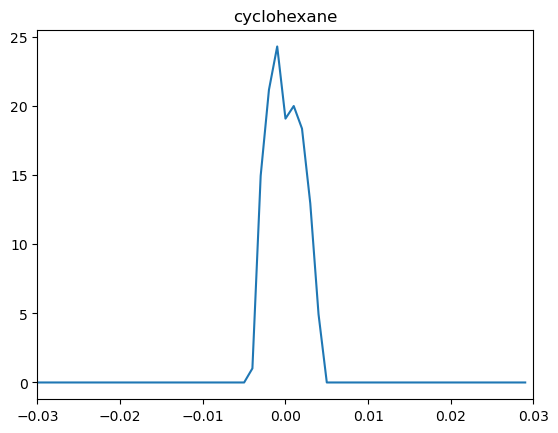

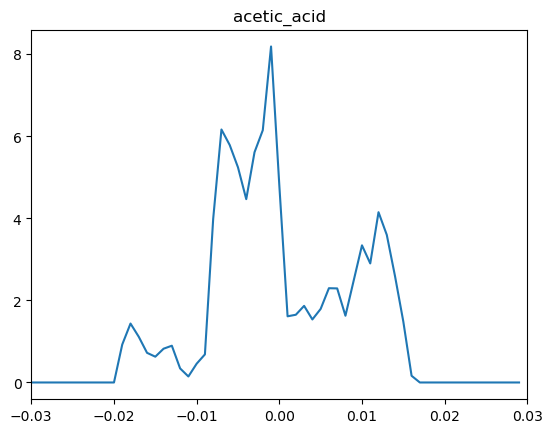

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from opencosmorspy.parameterization import openCOSMORS24a
from opencosmorspy.cosmors import COSMORS
from opencosmorspy.input_parsers import SigmaProfileParser
crs = COSMORS(par=openCOSMORS24a())

crs.add_molecule(['./../tests/COSMO_ORCA/cyclohexane.orcacosmo'])
crs.add_molecule(['./../tests/COSMO_ORCA/acetic_acid.orcacosmo'])

# infinite dilution activity coefficient of cyclohexane in acetic acid at 25 C
x = np.array([0.0, 1.0])
T = 298
crs.add_job(x, T, refst='pure_component')

# infinite dilution activity coefficient of cyclohexane in acetic acid at 45 C
x = np.array([0.0, 1.0])
T = 318
crs.add_job(x, T, refst='pure_component')

# 50:50 mole fraction based mixture of cyclohexane and acetic acid
x = np.array([0.5, .5])
T = 298.15
crs.add_job(x, T, refst='pure_component')

results = crs.calculate()

print('Total logarithmic activity coefficient: ', results['tot']['lng'], '\n')

print('Residual logarithmic activity coefficient: ', results['enth']['lng'])
print('Combinatorial logarithmic activity coefficient:', results['comb']['lng'])

sigma_profile_data = {}

for molecule in crs.enth.mol_lst:
    molecule_filepath = molecule.cosmo_struct_lst[0].filepath
    molecule_name = molecule.cosmo_struct_lst[0].filename.replace('.orcacosmo', '')
    spp = SigmaProfileParser(molecule_filepath)
    sigmas, areas = spp.cluster_and_create_sigma_profile()
    sigma_profile_data[molecule_name] = {'Sigma': sigmas, 'Area': areas}

    plt.title(molecule_name)
    plt.plot(sigmas, areas)
    plt.xlim([-0.03, 0.03])
    plt.show()

# output to excel
results_data = {}
results_data[f'Temperature (K)'] = []

n_molecules = len(crs.enth.mol_lst)
for i_molecule in range(n_molecules):    
    results_data[f'Concentration_{i_molecule+1}'] = []
    results_data[f'ln_Gamma_total_{i_molecule+1}'] = []

for i_job in range(len(results['x'])):
    results_data['Temperature (K)'].append(results['T'][i_job])
    for i_molecule in range(n_molecules):
        results_data[f'Concentration_{i_molecule+1}'].append(results['x'][i_job][i_molecule])
    for i_molecule in range(n_molecules):
        results_data[f'ln_Gamma_total_{i_molecule+1}'].append(results['tot']['lng'][i_job][i_molecule])

with pd.ExcelWriter('cosmors_results.xlsx', engine='openpyxl') as writer:
    # First sheet: Sigma profiles
    sigma_profiles_df = pd.DataFrame()
    for name, data in sigma_profile_data.items():
        df = pd.DataFrame({f'{name}_Sigma': data['Sigma'], f'{name}_Area': data['Area']})
        sigma_profiles_df = pd.concat([sigma_profiles_df, df], axis=1)
    sigma_profiles_df.to_excel(writer, sheet_name='Sigma Profiles', index=False)

    # Second sheet: Calculation results
    results_df = pd.DataFrame(results_data)
    results_df.to_excel(writer, sheet_name='Results', index=False)

Exymple calculating the solubility of acetaminophen/paracetamol in several solvents

In [18]:
import os
from scipy.optimize import fsolve

# Add molecules
solute_file = './../tests/COSMO_ORCA/acetaminophen.orcacosmo' # Replace with actual solute file


# Constants
R = 8.314  # Gas constant, J/(mol·K)
delta_h_fusion = 27.1 * 1000  # Fusion enthalpy of the solute (J/mol)
t_fusion = 443.6 # Fusion temperature of the solute (K)
temperature = 298.15  # Temperature for the solubility calculation (K)

def calc_solubility(crs, delta_h_fusion, t_fusion, temperature, iterative=False):
    rhs = -delta_h_fusion / R * (1 / temperature - 1 / t_fusion)

    def calculate_gamma(x):
        crs.clear_jobs()
        crs.add_job(x, temperature, refst='pure_component')
        results = crs.calculate()
        return results['tot']['lng'][0][0]

    if not iterative:
        ln_gamma_inf = calculate_gamma(np.array([0.0, 1.0])) 
        return np.exp(rhs) / np.exp(ln_gamma_inf)
    
    def equilibrium_condition(x_guess):
        x_guess = max(1e-15, x_guess)
        x_guess = min(1, x_guess)
        x = np.array([x_guess, 1 - x_guess])
        ln_gamma = calculate_gamma(x)
        diff = np.abs(ln_gamma + np.log(x_guess) - rhs)
        return diff

    result = fsolve(equilibrium_condition, 1e-5)
    
    x = max(1e-15, result[0])
    x = min(1, x)
    return x

# exp data from: https://doi.org/10.1021/je990124v
exp_data = {
    'water': 0.002068248,
    'ethanol': 0.066236658,
    'acetic_acid': 0.031816953,
    'cyclohexane': 'N/A'
}
try:
    print(f'Solubility of acetaminophen/paracetamol in')
    for solvent_file in ['./../tests/COSMO_ORCA/water.orcacosmo',
                         './../tests/COSMO_ORCA/ethanol.orcacosmo',
                         './../tests/COSMO_ORCA/acetic_acid.orcacosmo',
                         './../tests/COSMO_ORCA/cyclohexane.orcacosmo']:
        
        solvent_name = os.path.basename(solvent_file).replace('.orcacosmo', '')
        crs.clear_molecules()
        crs.add_molecule([solute_file])
        crs.add_molecule([solvent_file])
        x_solubility_non_iterative = calc_solubility(crs, delta_h_fusion, t_fusion, temperature, iterative=False)

        x_solubility_iterative = calc_solubility(crs, delta_h_fusion, t_fusion, temperature, iterative=True)
        exp_val = f'{exp_data[solvent_name]:.5f}' if exp_data[solvent_name] != 'N/A' else exp_data[solvent_name]
        print(solvent_name.ljust(15), f"non-iter calc: {x_solubility_non_iterative:.5f}", f"iter calc: {x_solubility_iterative:.5f}", f"exp: {exp_val}")

except Exception as e:
    print(f"Error in solubility calculation: {e}")
    print("Potential reasons for failure:")
    print("1. Activity coefficients calculated by COSMO-RS could be unrealistic at extreme compositions.")
    print("2. The thermodynamic parameters (e.g., delta_h_fusion or t_fusion) might be inaccurate.")
    print("3. Issues with the openCOSMO-RS input files or parameterization might affect calculations.")

Solubility of acetaminophen/paracetamol in
water           non-iter calc: 0.00084 iter calc: 0.00022 exp: 0.00207
ethanol         non-iter calc: 0.11384 iter calc: 0.07131 exp: 0.06624
acetic_acid     non-iter calc: 0.05655 iter calc: 0.04550 exp: 0.03182
cyclohexane     non-iter calc: 0.00000 iter calc: 0.00000 exp: N/A
